# Repeating the same steps but filling the null values this time 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
def label_encode(df, col_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col_name])
    df[col_name] = label_encoder.transform(df[col_name])

In [3]:
def normaliser(df, col_name):
    col_2D = np.array(df[col_name]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(col_2D)
    df[col_name] = scaler.transform(col_2D)

In [4]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
print(f"The data has {weather_data.shape[0]} rows")
print(f"The data has {weather_data.shape[1]} columns")

The data has 145460 rows
The data has 23 columns


In [6]:
weather_data.isna().sum().sort_values(ascending= False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [7]:
null_cols = weather_data.columns[weather_data.isna().any()].tolist()
print(f"Null columnns are {null_cols}")

Null columnns are ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [8]:
a = ((weather_data.isna().sum())/len(weather_data)).sort_values(ascending= False)
a

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

In [9]:
cols_to_remove = []
for i in range(len(null_cols)):
    if a[i] > 0.10:
        cols_to_remove.append(a.index[i])
cols_to_remove

['Sunshine',
 'Evaporation',
 'Cloud3pm',
 'Cloud9am',
 'Pressure9am',
 'Pressure3pm']

In [10]:
weather_data.drop(cols_to_remove, axis= 1, inplace= True)
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [11]:
weather_data.isna().sum().sort_values(ascending= False)

WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

## Filling the missing numeric cols with the mean 

In [12]:
weather_data.fillna(weather_data.mean(numeric_only= True), inplace= True)

In [13]:
weather_data.drop('Date', axis= 1, inplace= True)

In [14]:
weather_data.isna().sum().sort_values(ascending= False)

WindDir9am       10566
WindGustDir      10326
WindDir3pm        4228
RainTomorrow      3267
RainToday         3261
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Temp9am              0
Temp3pm              0
dtype: int64

In [15]:
categorical_cols = []
for col in weather_data.columns:
    if weather_data[col].dtypes == 'O':
        categorical_cols.append(col)

In [16]:
categorical_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

## Filling the missing categorical cols with mode 

In [17]:
for col in categorical_cols:
    weather_data[col].fillna(weather_data[col].mode()[0], inplace= True)

In [18]:
weather_data.isna().sum().sort_values(ascending= False)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
unique_vals, unique_counts = [], []
for col in categorical_cols:
    unique_vals.append(np.unique(weather_data[col]))
    unique_counts.append(len(np.unique(weather_data[col])))
    
categorical_analysis = pd.DataFrame({'Columns' : categorical_cols, 
                                    'Categories' : unique_vals, 
                                    'Counts' : unique_counts})

In [20]:
categorical_analysis

,Columns,Categories,Counts
0,Location,"[Adelaide, Albany, Albury, AliceSprings, Badge...",49
1,WindGustDir,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
2,WindDir9am,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
3,WindDir3pm,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
4,RainToday,"[No, Yes]",2
5,RainTomorrow,"[No, Yes]",2


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
np.random.seed(5)
train_data, test_data = train_test_split(weather_data, test_size= 0.2)

In [23]:
train_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
143785,Katherine,24.0,35.1,0.0,N,43.0,WNW,SE,2.0,9.0,88.0,51.539116,27.0,21.68339,No,Yes
43912,Wollongong,13.7,20.6,0.0,NE,44.0,NNE,NE,19.0,37.0,65.0,73.000000,17.6,18.40000,No,No
22856,NorfolkIsland,17.8,25.2,0.0,NE,26.0,NE,ESE,17.0,13.0,71.0,66.000000,22.9,24.40000,No,No
40312,Williamtown,19.5,22.9,5.4,SE,44.0,SE,SE,31.0,28.0,95.0,65.000000,19.5,22.00000,Yes,Yes
32572,Sydney,22.1,33.9,0.0,SSE,63.0,SSE,E,7.0,22.0,36.0,46.000000,31.0,30.30000,No,No


In [24]:
for col in categorical_cols:
    label_encode(train_data, col)
    label_encode(test_data, col)

for col in train_data.columns:
    normaliser(train_data, col)
    normaliser(test_data, col)

In [25]:
train_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
143785,0.333333,0.804455,0.754253,0.000000,0.200000,0.286822,0.933333,0.600000,0.022989,0.108434,0.88,0.515391,0.721519,0.524872,0.0,1.0
43912,0.979167,0.549505,0.480151,0.000000,0.266667,0.294574,0.333333,0.266667,0.218391,0.445783,0.65,0.730000,0.523207,0.461240,0.0,0.0
22856,0.562500,0.650990,0.567108,0.000000,0.266667,0.155039,0.266667,0.133333,0.195402,0.156627,0.71,0.660000,0.635021,0.577519,0.0,0.0
40312,0.937500,0.693069,0.523629,0.014555,0.600000,0.294574,0.600000,0.600000,0.356322,0.337349,0.95,0.650000,0.563291,0.531008,1.0,1.0
32572,0.770833,0.757426,0.731569,0.000000,0.666667,0.441860,0.666667,0.000000,0.080460,0.265060,0.36,0.460000,0.805907,0.691860,0.0,0.0


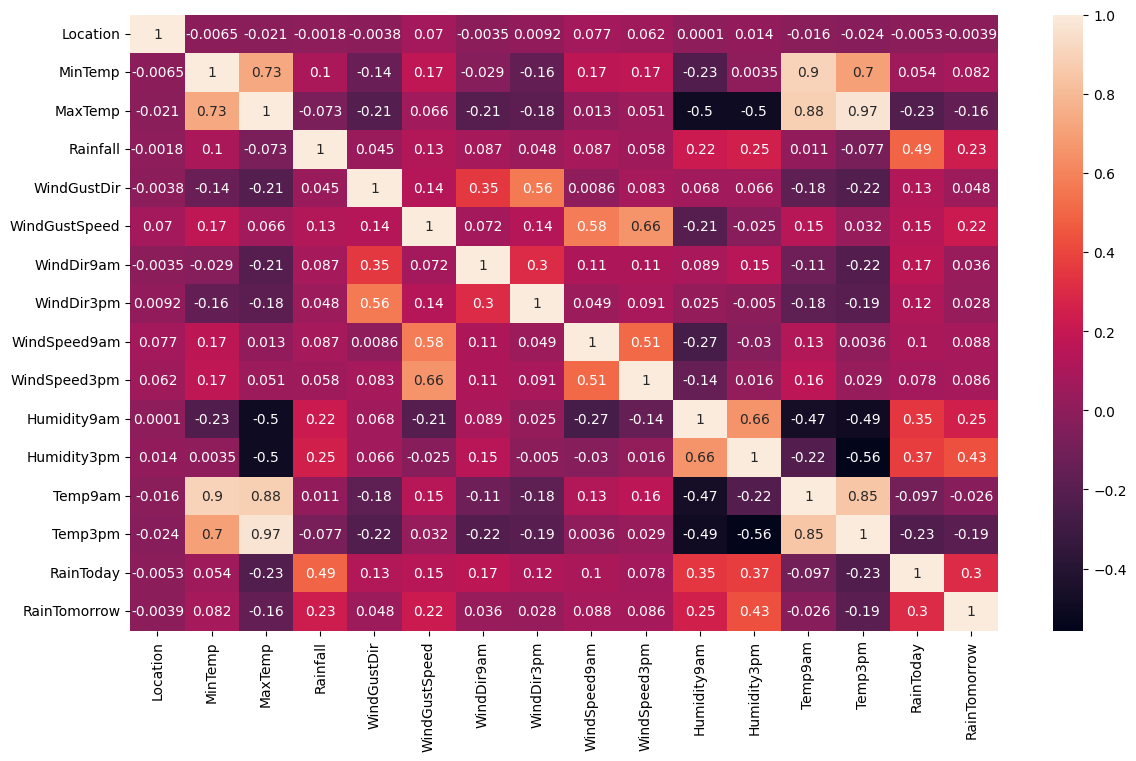

In [26]:
fig, ax = plt.subplots(figsize= (14,8))
sns.heatmap(train_data.corr(), annot= True);

In [27]:
related = train_data.corr()['RainTomorrow'].sort_values(ascending = False)
related

RainTomorrow     1.000000
Humidity3pm      0.433603
RainToday        0.303617
Humidity9am      0.250784
Rainfall         0.232618
WindGustSpeed    0.221608
WindSpeed9am     0.087753
WindSpeed3pm     0.086067
MinTemp          0.082438
WindGustDir      0.048414
WindDir9am       0.036394
WindDir3pm       0.028021
Location        -0.003932
Temp9am         -0.025818
MaxTemp         -0.157169
Temp3pm         -0.188327
Name: RainTomorrow, dtype: float64

In [28]:
X_train = train_data[['WindGustSpeed', 'RainToday', 'Humidity3pm']]
X_train.head()

,WindGustSpeed,RainToday,Humidity3pm
143785,0.286822,0.0,0.515391
43912,0.294574,0.0,0.730000
22856,0.155039,0.0,0.660000
40312,0.294574,1.0,0.650000
32572,0.441860,0.0,0.460000


In [29]:
X_test = test_data[['WindGustSpeed', 'RainToday', 'Humidity3pm']]
X_test.head()

,WindGustSpeed,RainToday,Humidity3pm
125802,0.193277,1.0,0.606061
17997,0.277607,1.0,0.510496
133553,0.361345,1.0,0.414141
40779,0.285714,0.0,0.333333
90533,0.159664,0.0,0.626263


In [30]:
y_train = train_data['RainTomorrow']
y_test = test_data['RainTomorrow']

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8262065172556029

In [32]:
clf.score(X_train, y_train)

0.8486267702461158

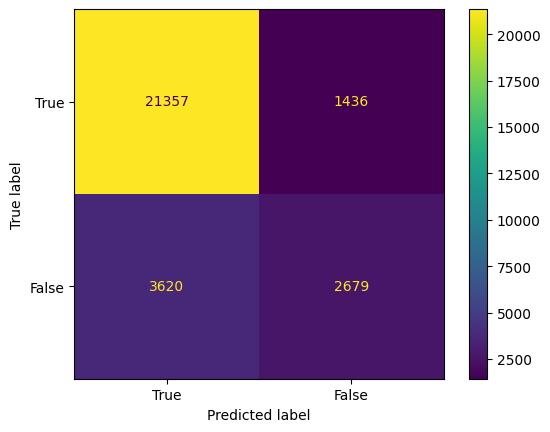

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm_matrix, display_labels= [True, False])
cm_display.plot();

In [34]:
from sklearn.neighbors import KNeighborsClassifier
score = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors= k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(clf.score(X_test, y_test))

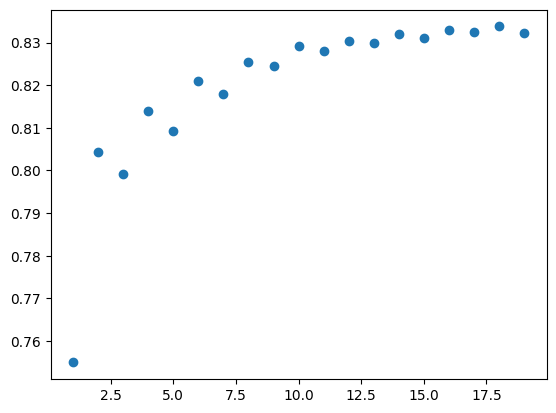

In [35]:
plt.scatter(x= [i for i in range(1, 20)], y= score);

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.837240478482057

In [37]:
clf.score(X_train, y_train)

0.8348944727072735

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth= 7)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8373092259040286

In [42]:
clf.score(X_train, y_train)

0.83808263440121

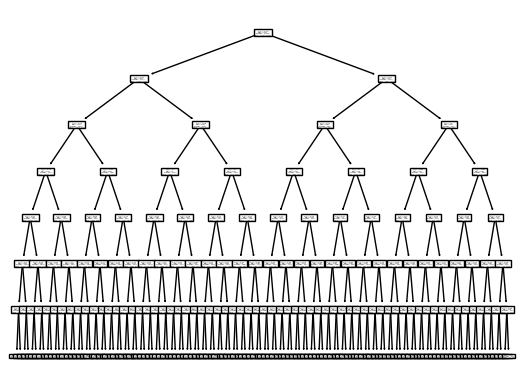

In [43]:
plot_tree(clf);